## Setup

In [1]:
from src.phrase_analysis import process_directory, plot_phrase_frequency_over_time_all, plot_length_distribution, analyze_files_phrase_occurrences, get_recent_contexts_all, get_per_appearance_frequency
from src.regex_pattern_generator import generate_regex_patterns
from datetime import datetime

In [2]:
INAUGURATION_DATE = datetime(2025, 1, 20)
CONTEXT_WINDOW = 200 # words to display for context

In [50]:
# PHRASES = ['World War',
#  'Ukraine',
#  'Trafficking / Smuggling',
#  'Terrorist / Terrorism',
#  'Tariff',
#  'Sanction',
#  'Rare Earth / Mineral',
#  'Putin',
#  'President Xi',
#  'Oil',
#  'New York',
#  'Nuclear',
#  'Middle East',
#  'Israel',
#  'Iran',
#  'Palestine',
#  'Immigration / Migration',
#  'Golden Age',
#  'Gaza',
#  'Free Speech',
#  'Fair Share',
#  'Europe / European',
#  'Election',
#  'Dead',
#  'Communism / Socialism',
#  'Border',
#  'Biden',
#  'America First',
#  'AI / Artificial Intelligence',
#  '250 / 250th']
PHRASES = ['America / American', # 30+ times
 'Russia / Ukraine', # 7+ times
 'Peace', # 10+ times
 'God', # 5+ times
 'Nuclear', # 3+ times
 'China', # 3+ times
 'Biden', # 2+ times
 'Sovereignty',
 'October 7th',
 'King',
 'Maduro',
 'Globalist / Globalism',
 'Israel',
 'Vladimir',
 'Crypto / Bitcoin',
 'Obliterate / Obliterated / Obliteration',
 'Hottest',
 'Seven Wars']

SEARCH_PHRASES = generate_regex_patterns(PHRASES)

from pprint import pprint
pprint(SEARCH_PHRASES)

{'America / American': "\\b(?:\\w+-)*(?:(?:america|americas|america's|americas'|american|americans|american's|americans'))(?:-\\w+)*(?=\\W|$)[.,!?;:]*",
 'Biden': "\\b(?:\\w+-)*(?:biden|bidens|biden's|bidens')(?:-\\w+)*(?=\\W|$)[.,!?;:]*",
 'China': "\\b(?:\\w+-)*(?:china|chinas|china's|chinas')(?:-\\w+)*(?=\\W|$)[.,!?;:]*",
 'Crypto / Bitcoin': "\\b(?:\\w+-)*(?:(?:crypto|cryptos|crypto's|cryptos'|bitcoin|bitcoins|bitcoin's|bitcoins'))(?:-\\w+)*(?=\\W|$)[.,!?;:]*",
 'Globalist / Globalism': "\\b(?:\\w+-)*(?:(?:globalist|globalists|globalist's|globalists'|globalism|globalisms|globalism's|globalisms'))(?:-\\w+)*(?=\\W|$)[.,!?;:]*",
 'God': "\\b(?:\\w+-)*(?:god|gods|god's|gods')(?:-\\w+)*(?=\\W|$)[.,!?;:]*",
 'Hottest': "\\b(?:\\w+-)*(?:hottest|hottests|hottest's|hottests')(?:-\\w+)*(?=\\W|$)[.,!?;:]*",
 'Israel': "\\b(?:\\w+-)*(?:israel|israels|israel's|israels')(?:-\\w+)*(?=\\W|$)[.,!?;:]*",
 'King': "\\b(?:\\w+-)*(?:king|kings|king's|kings')(?:-\\w+)*(?=\\W|$)[.,!?;:]*",
 'Maduro': "\\

In [51]:
# Set the category of interest
CATEGORY_OF_INTEREST = "speech"

# Process transcripts
df = process_directory('../data/processed-transcripts', SEARCH_PHRASES)
df = df.sort_values('date')

# Filter out press briefings and state of the union
df = df[df['category'] != 'press briefing']
df = df[df['category'] != 'sotu']

# Split data by date and category
category_mask = df['category'] == CATEGORY_OF_INTEREST
date_mask = df['date'] >= INAUGURATION_DATE

# Create category of interest dataframes 
df_category = df[category_mask]
df_category_pre = df[category_mask & ~date_mask]
df_category_post = df[category_mask & date_mask]

df_non_category = df[~category_mask]
df_pre = df[~date_mask]
df_post = df[date_mask]

# Print dataset statistics
print("Dataset Statistics:")

print(f"\nAll Transcripts:")
print(f"Total: {len(df)}")
print(f"Pre-inauguration: {len(df_pre)}")
print(f"Post-inauguration: {len(df_post)}")

print(f"\n{CATEGORY_OF_INTEREST.title()}s:")
print(f"Total: {len(df_category)}")
print(f"Pre-inauguration: {len(df_category_pre)}")
print(f"Post-inauguration: {len(df_category_post)}")

print(f"\nNon-{CATEGORY_OF_INTEREST.title()}s:")
print(f"Total: {len(df_non_category)}")
print(f"Pre-inauguration: {len(df_non_category[df_non_category['date'] < INAUGURATION_DATE])}")
print(f"Post-inauguration: {len(df_non_category[df_non_category['date'] >= INAUGURATION_DATE])}")

print("\nWord Count Statistics:")

print(f"\nAll Transcripts:")
print(f"Average length: {df['text_length'].mean():.0f} words") 

print(f"\n{CATEGORY_OF_INTEREST.title()}s:")
print(f"Average length: {df_category['text_length'].mean():.0f} words") 

print(f"\nNon-{CATEGORY_OF_INTEREST.title()}s:")
print(f"Average length: {df_non_category['text_length'].mean():.0f} words")


print("\nDate Ranges:")

print(f"\nAll Transcripts:")
print(f"Date range: {df['date'].min().strftime('%Y-%m-%d')} to {df['date'].max().strftime('%Y-%m-%d')}")

print(f"\n{CATEGORY_OF_INTEREST.title()}s:")
print(f"Date range: {df_category['date'].min().strftime('%Y-%m-%d')} to {df_category['date'].max().strftime('%Y-%m-%d')}")

print(f"\nNon-{CATEGORY_OF_INTEREST.title()}s:")
print(f"Date range: {df_non_category['date'].min().strftime('%Y-%m-%d')} to {df_non_category['date'].max().strftime('%Y-%m-%d')}")

Categories found in directory:
- b-roll
- convention
- court transcript
- debate
- donald trump vlog
- interview
- interview - not public
- leaked remarks
- leaked transcript
- letter
- mueller report
- official document
- op-ed
- prepared remarks
- press briefing
- press conference
- press gaggle
- processed-transcripts
- remarks
- sotu
- speech
- un-addresses
- uncategorized
- weekly address
Dataset Statistics:

All Transcripts:
Total: 3707
Pre-inauguration: 3310
Post-inauguration: 397

Speechs:
Total: 684
Pre-inauguration: 650
Post-inauguration: 34

Non-Speechs:
Total: 3023
Pre-inauguration: 2660
Post-inauguration: 363

Word Count Statistics:

All Transcripts:
Average length: 3339 words

Speechs:
Average length: 8572 words

Non-Speechs:
Average length: 2155 words

Date Ranges:

All Transcripts:
Date range: 2016-07-01 to 2025-09-21

Speechs:
Date range: 2016-07-01 to 2025-09-21

Non-Speechs:
Date range: 2016-07-14 to 2025-09-21


## Phrase Frequency Over Time

Speeches dropped off dramatically between election day and inauguration day. Non-speech transcripts mostly don't go back as far in time (need to scrape more data)


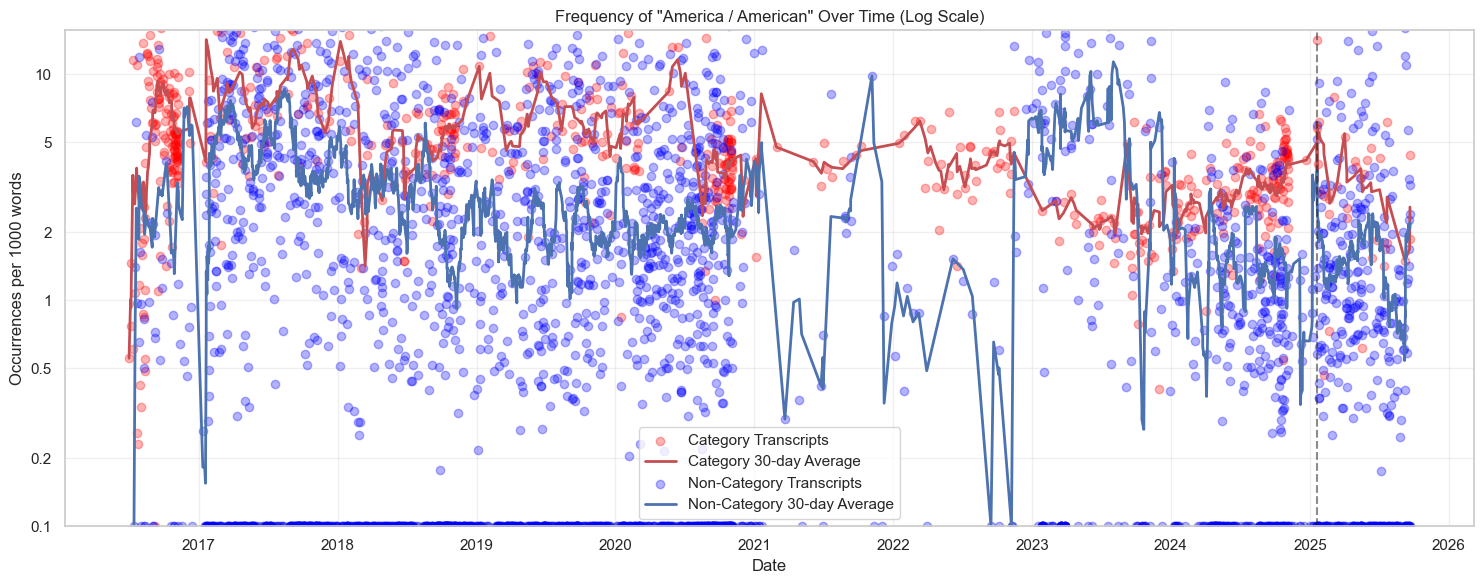


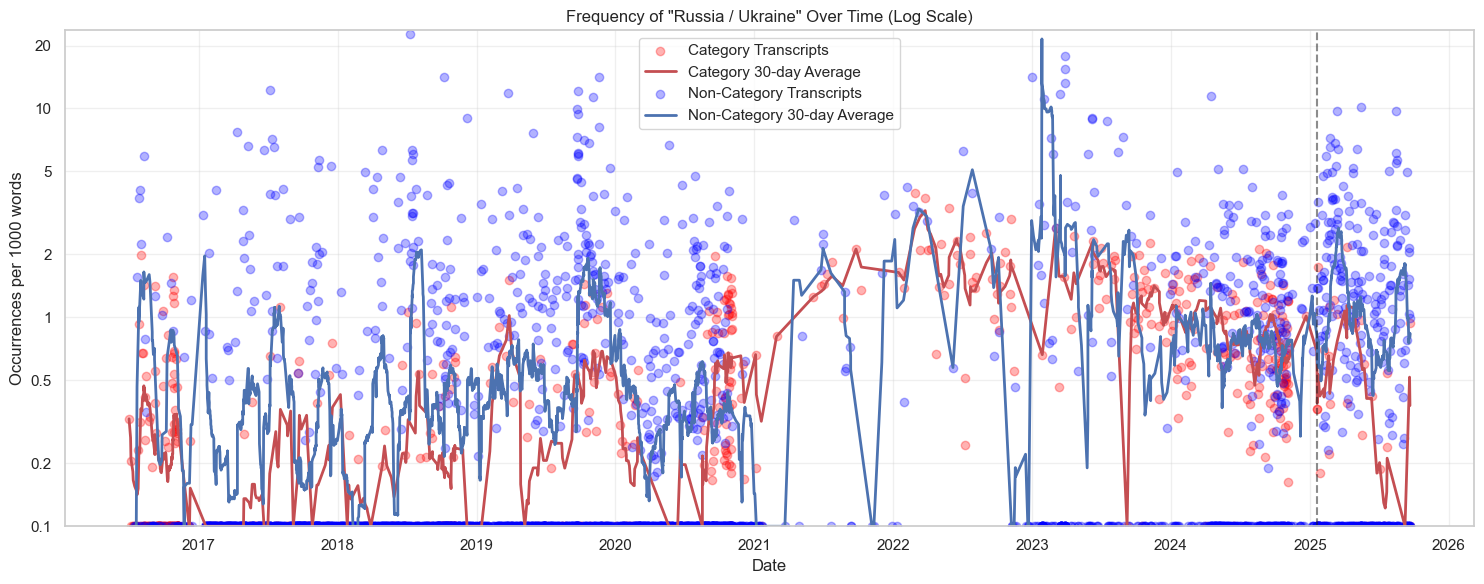


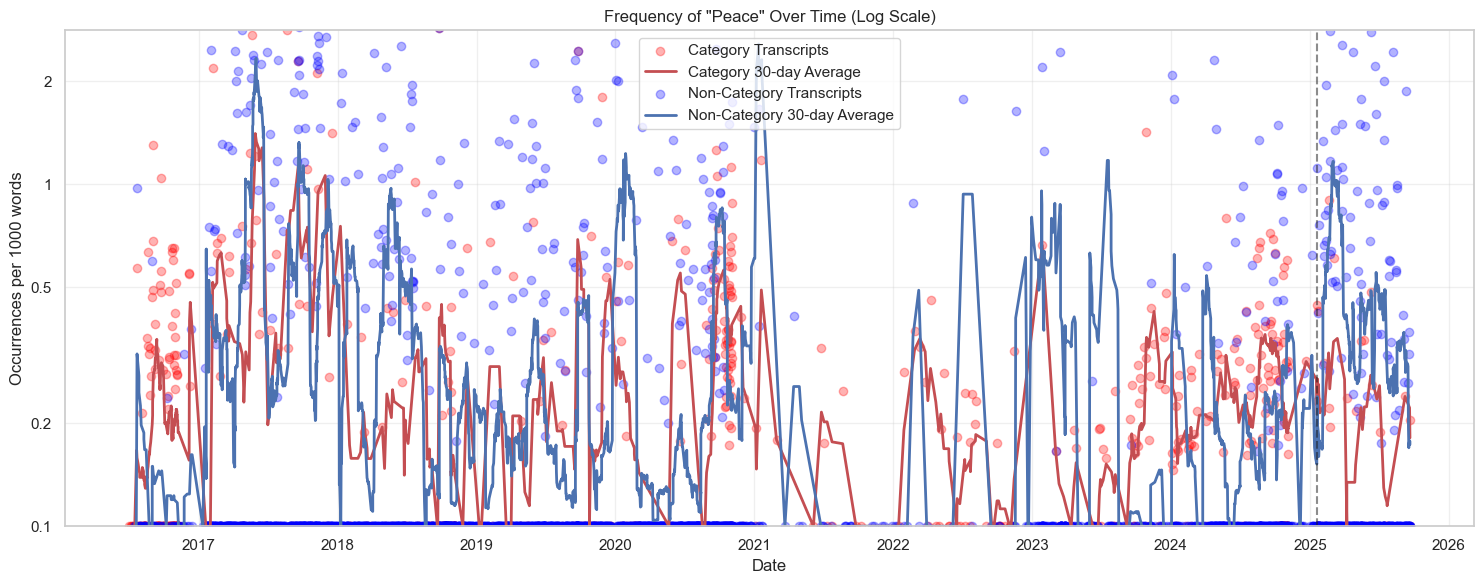


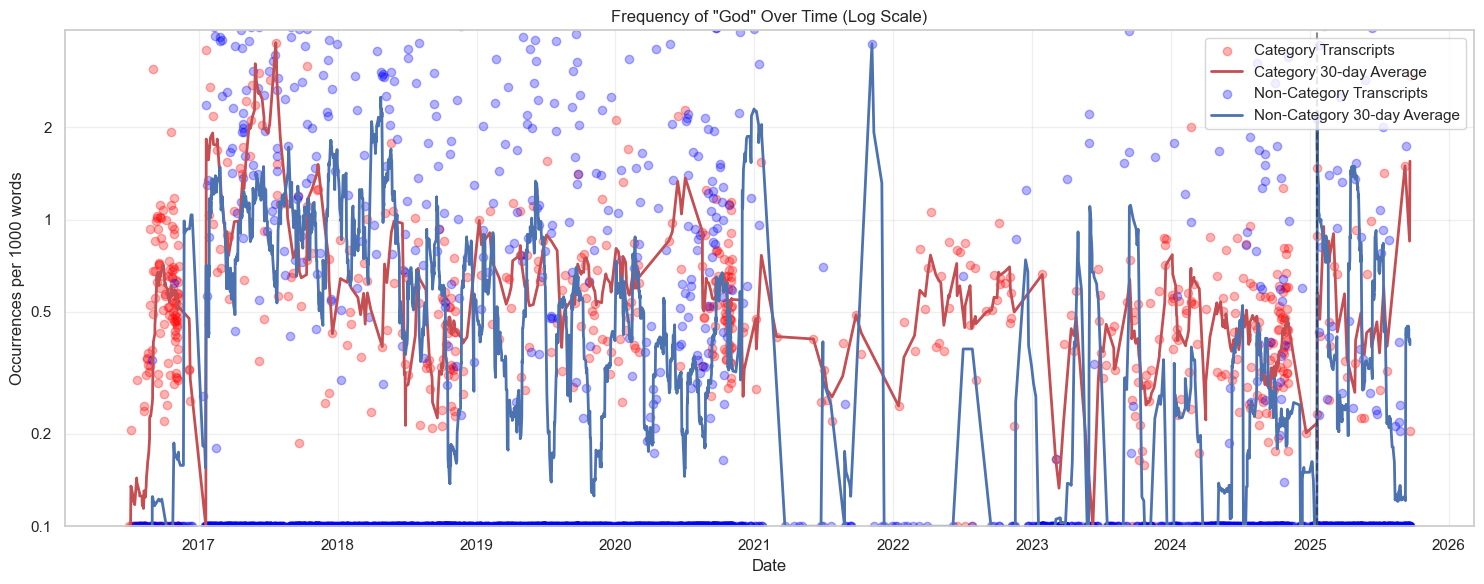


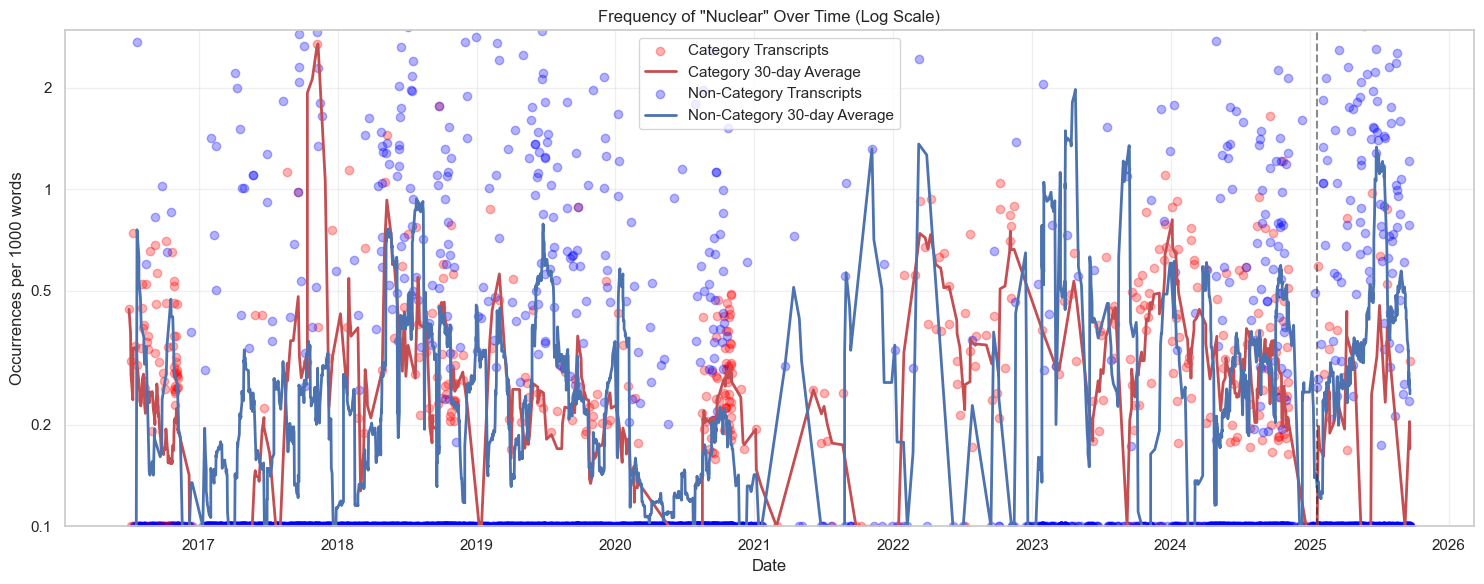


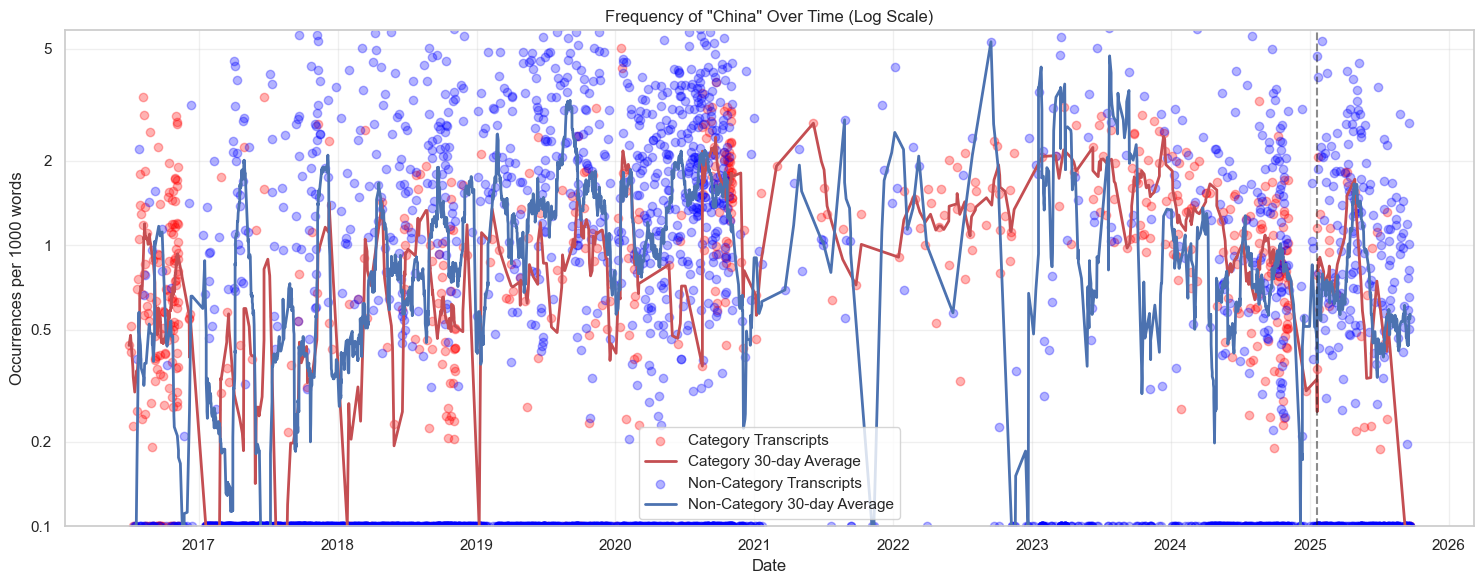


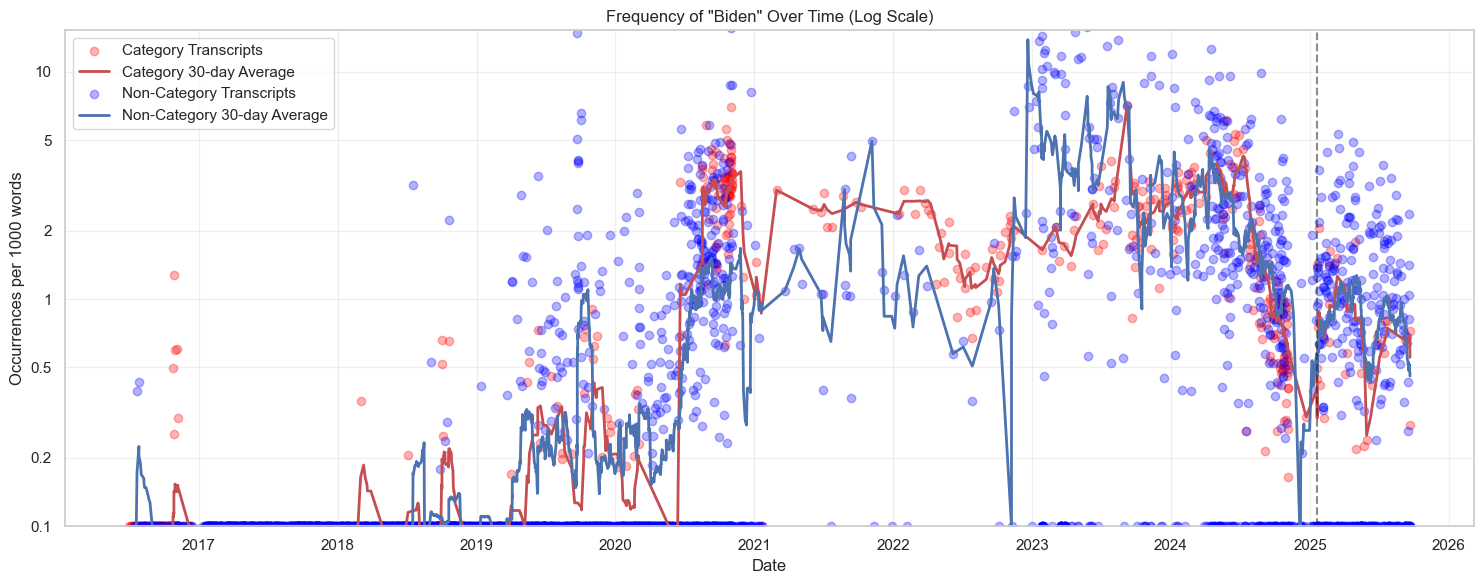


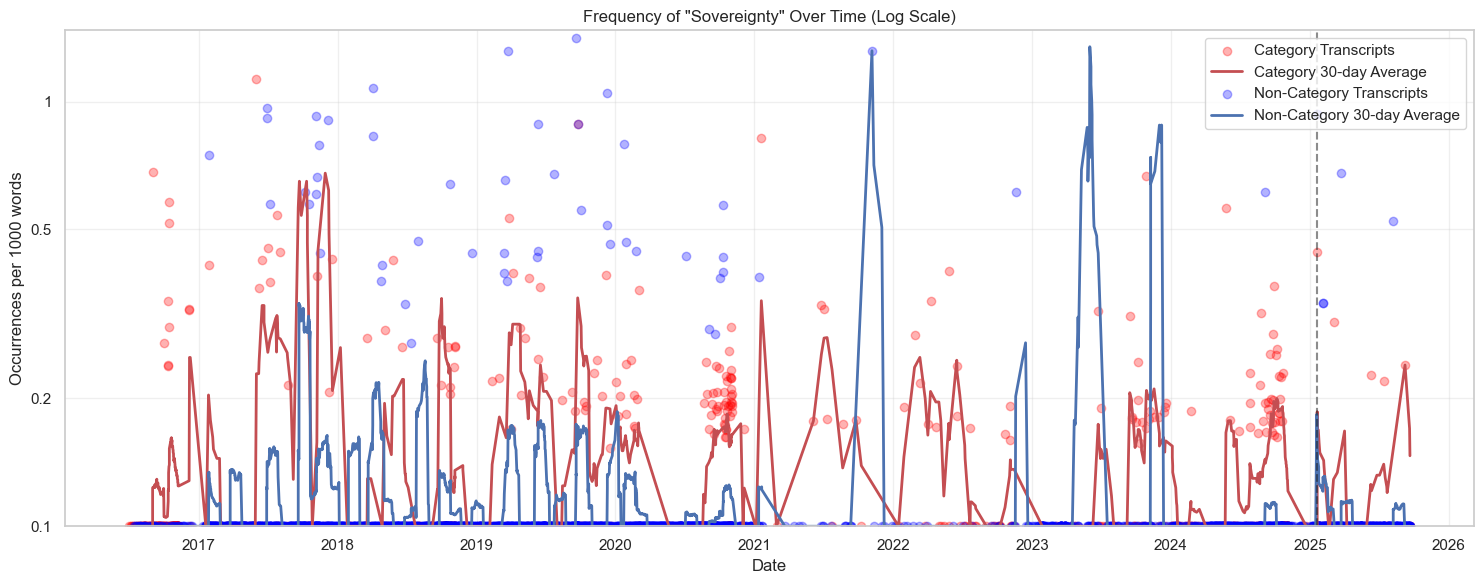


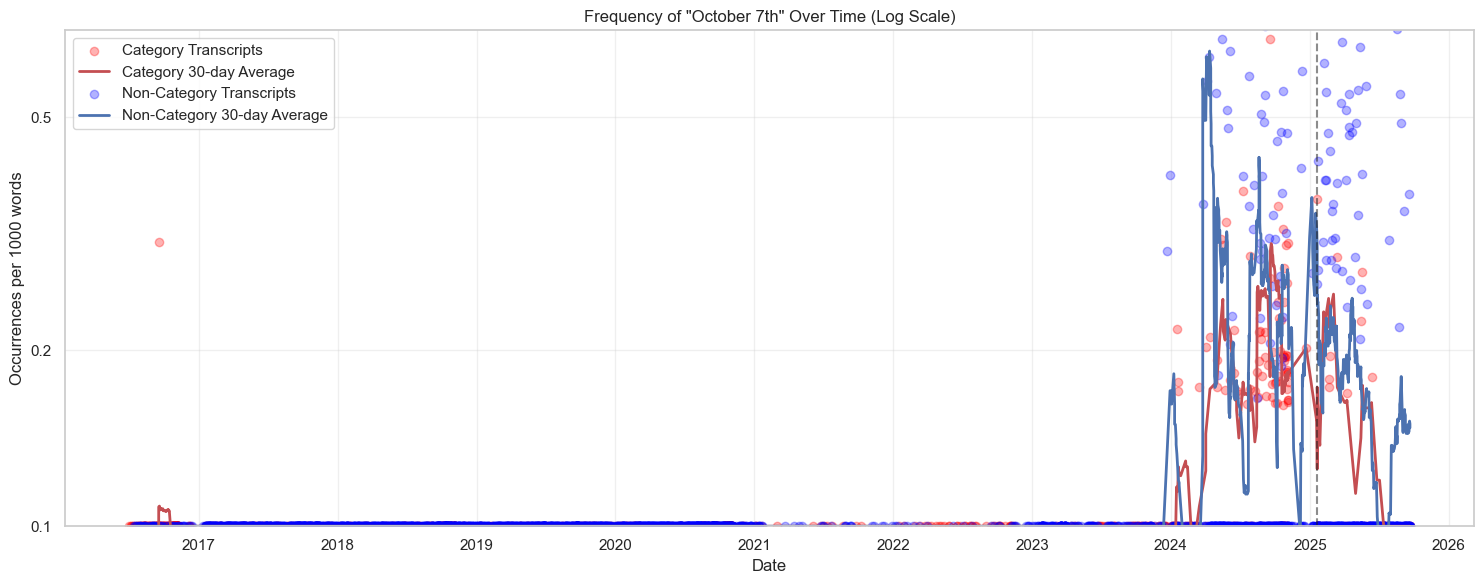


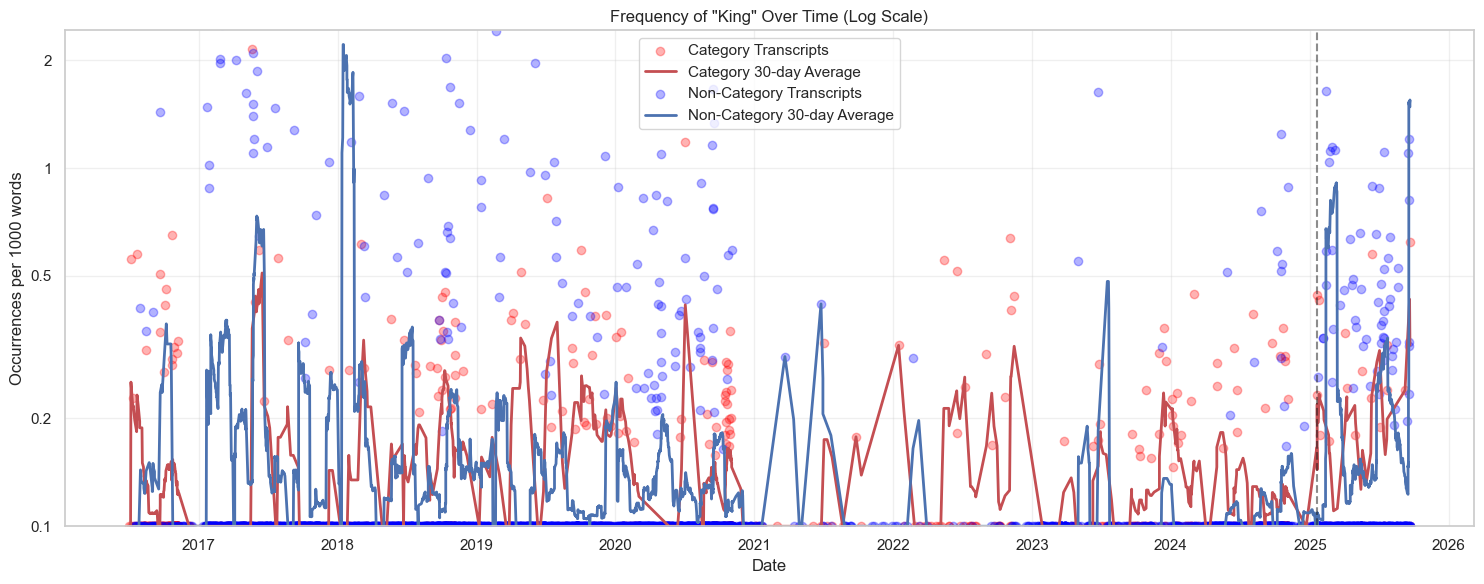


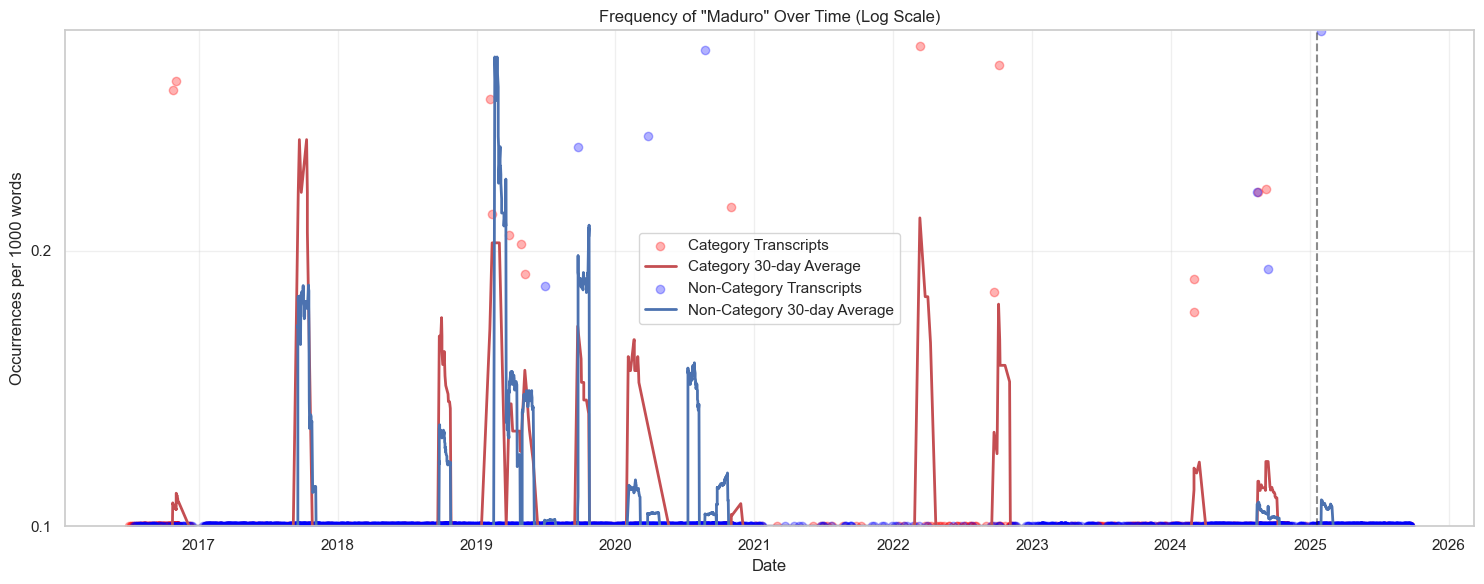


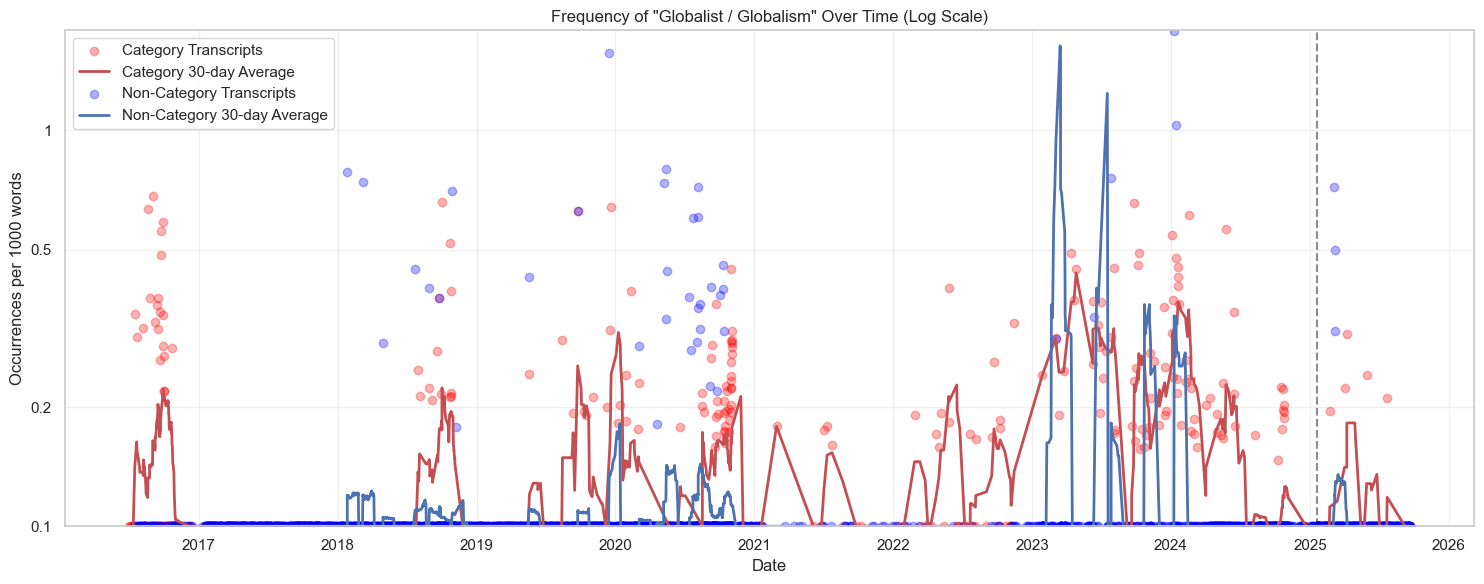


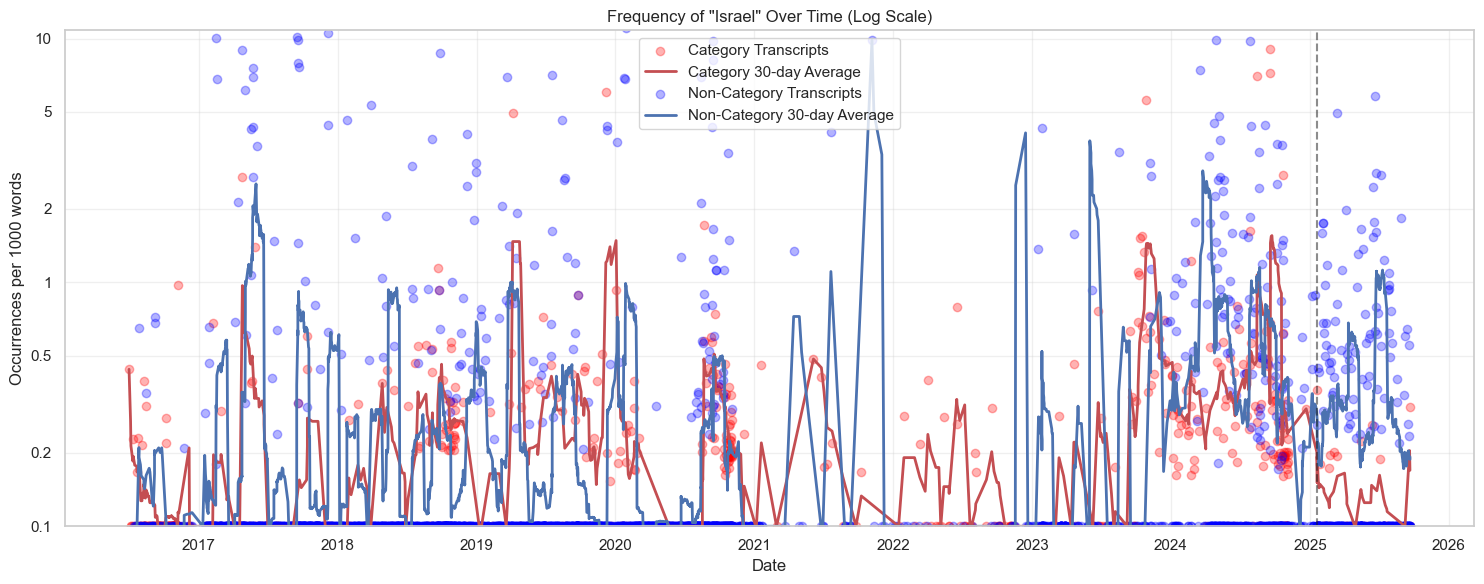


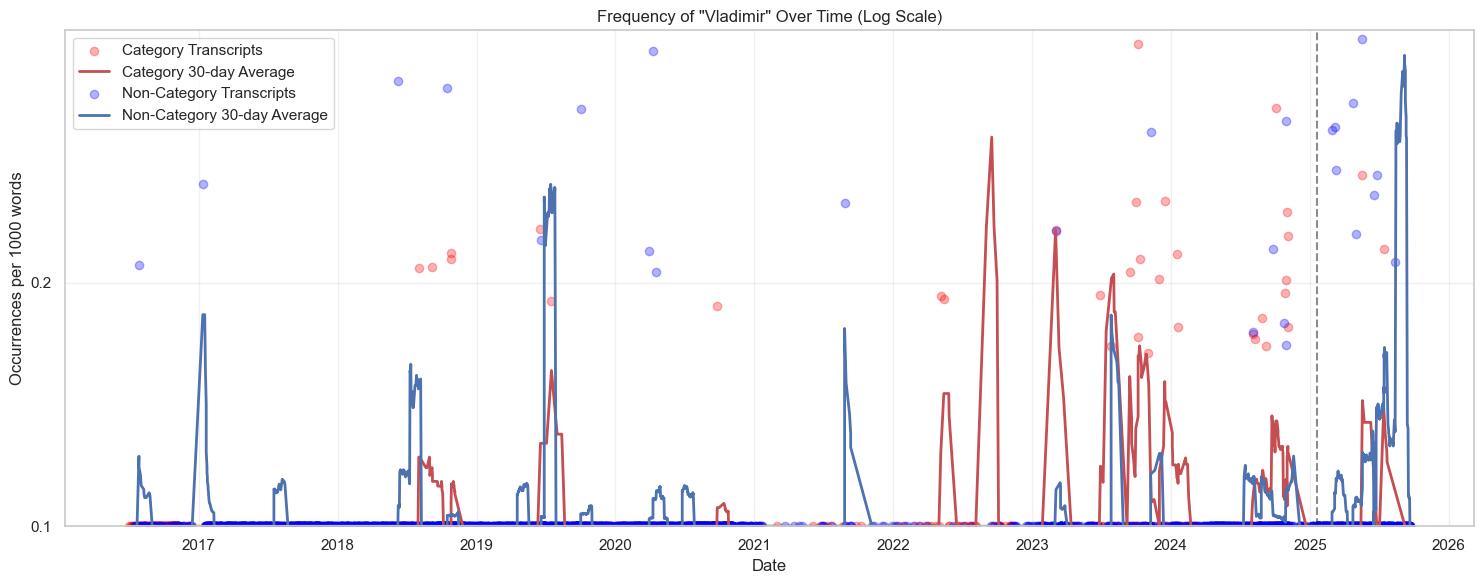


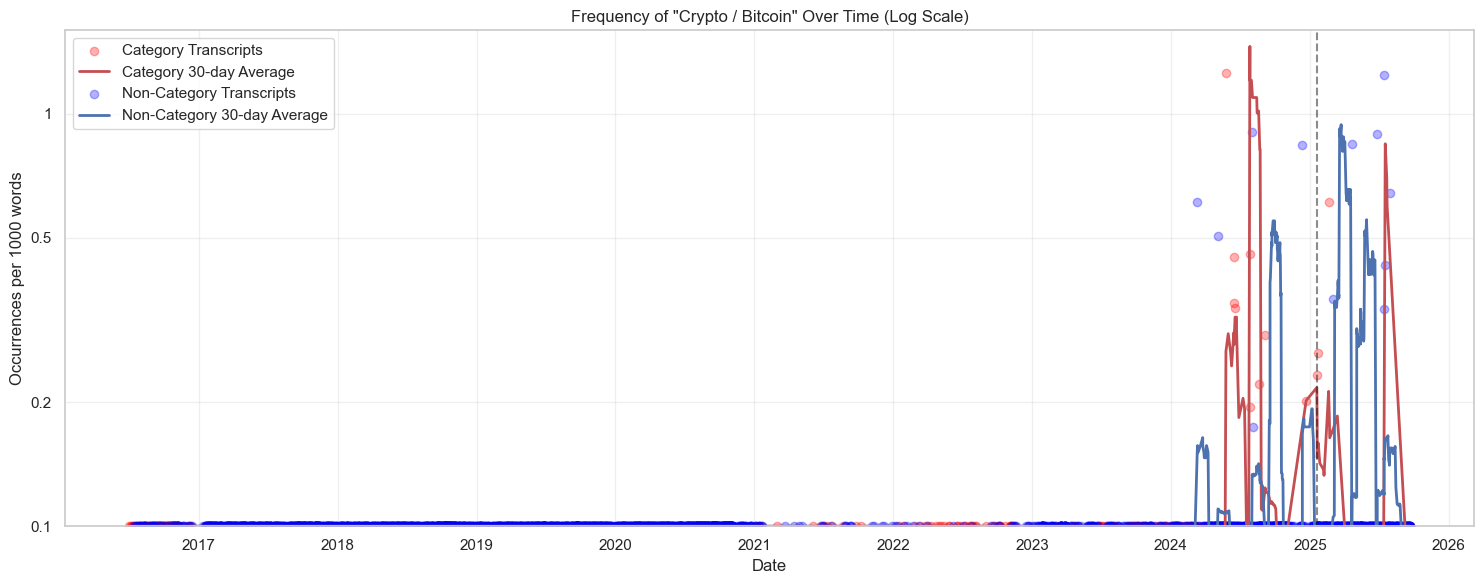


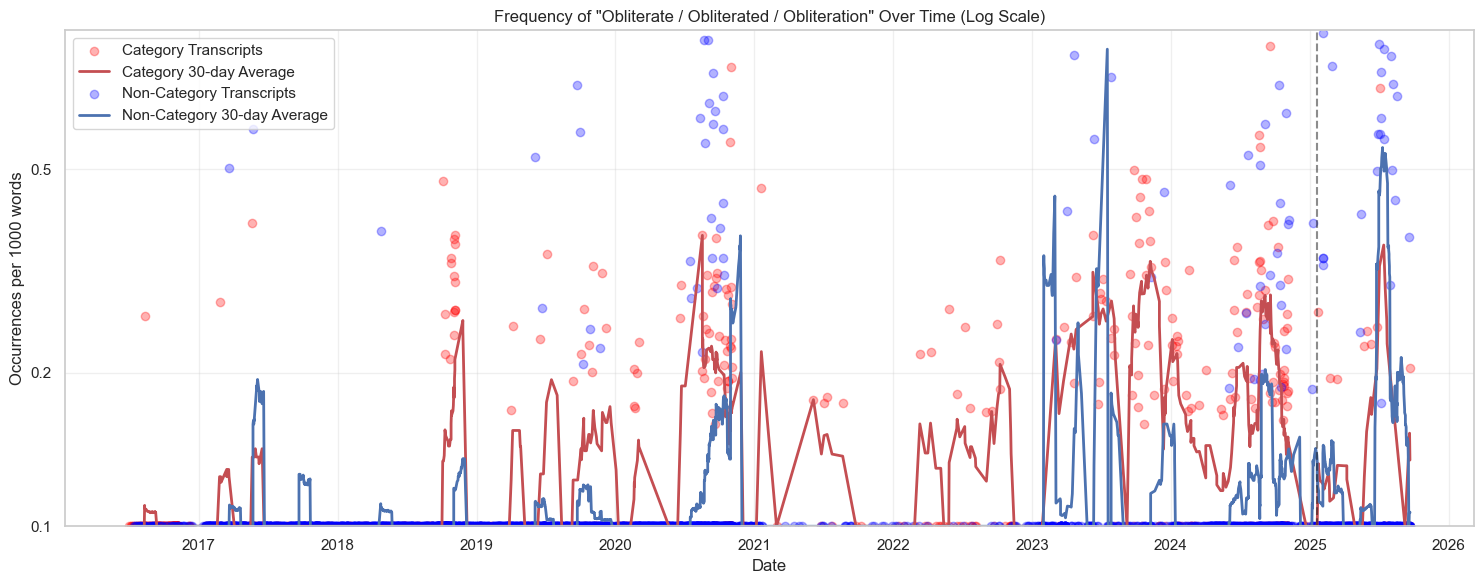


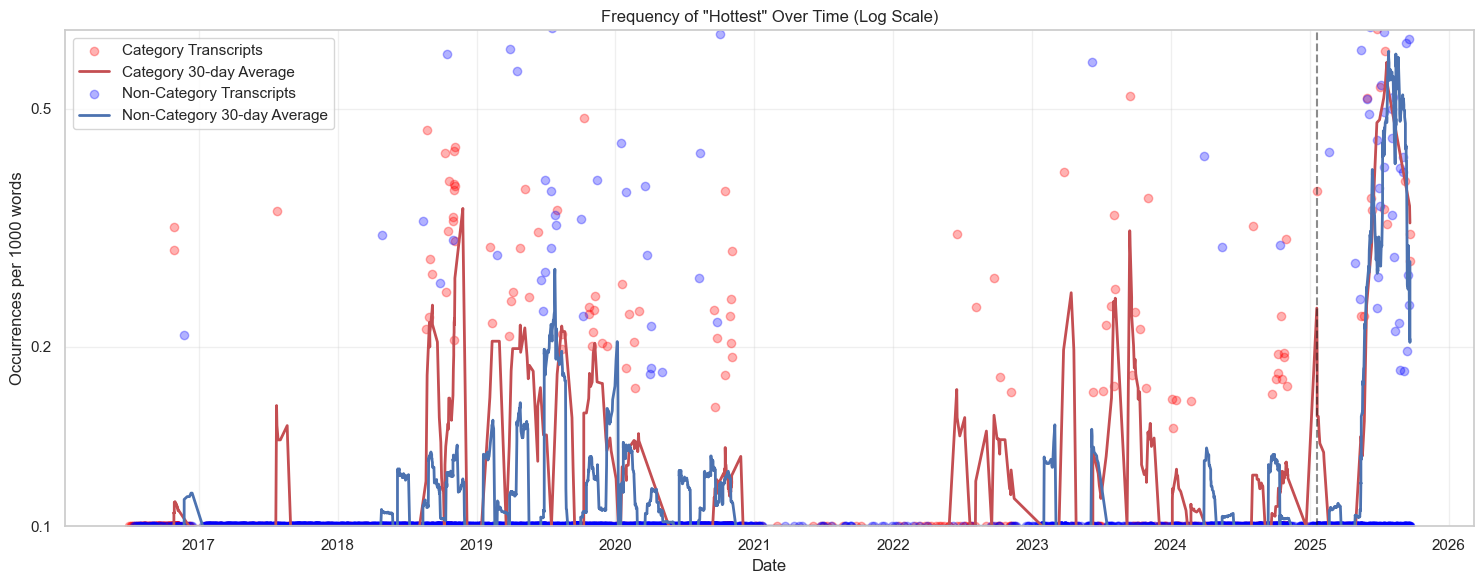


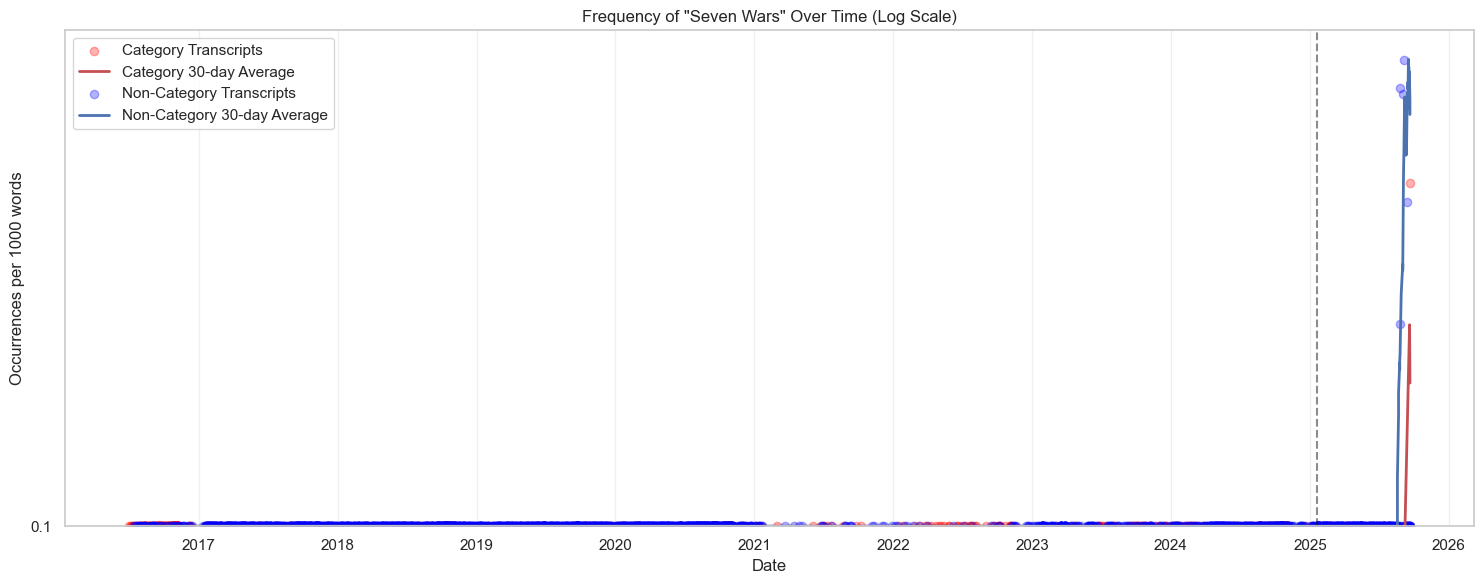

In [52]:

plot_phrase_frequency_over_time_all(df_category, df_non_category, SEARCH_PHRASES, log_scale=True, window=30)

Expected length from category data: 8575 words


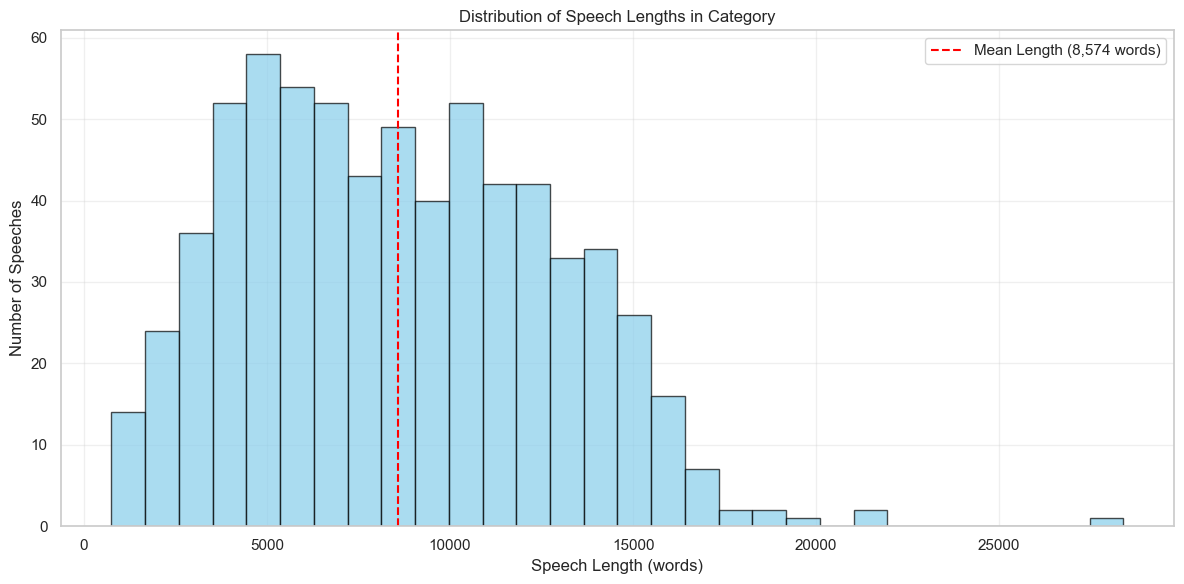

In [38]:
plot_length_distribution(df_category)

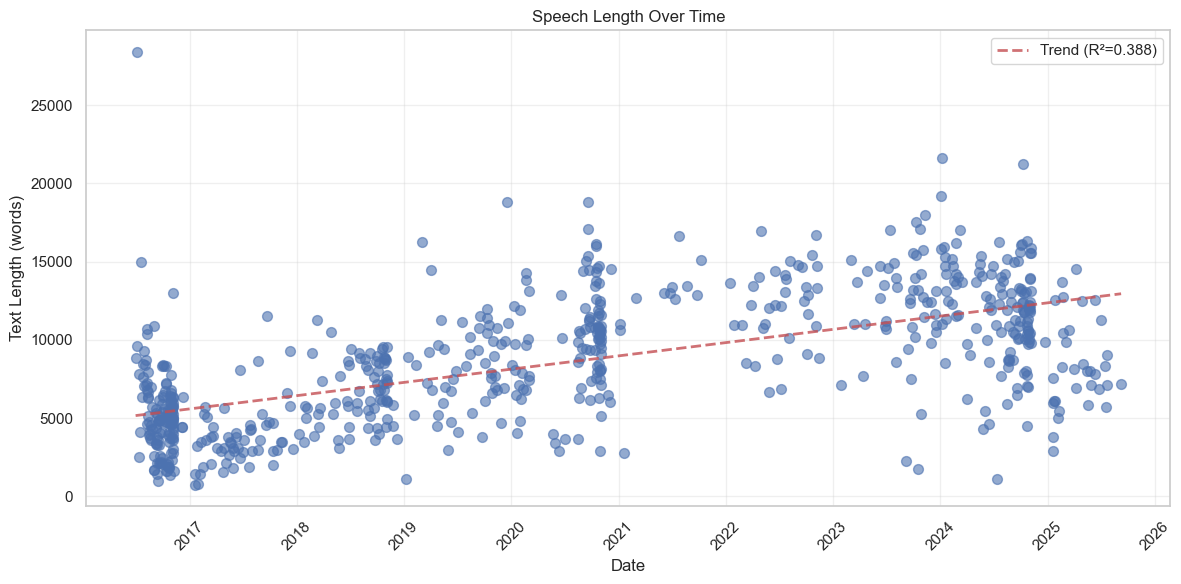

In [40]:
def plot_length_over_time(df, title="Length Over Time"):
    """Plot text length over time"""
    import matplotlib.pyplot as plt
    import matplotlib.dates as mdates
    
    plt.figure(figsize=(12, 6))
    
    # Sort by date
    df_sorted = df.sort_values('date')
    
    # Plot scatter plot
    plt.scatter(df_sorted['date'], df_sorted['text_length'], alpha=0.6, s=50)
    
    # Add trend line
    from scipy import stats
    x_numeric = mdates.date2num(df_sorted['date'])
    slope, intercept, r_value, p_value, std_err = stats.linregress(x_numeric, df_sorted['text_length'])
    trend_line = slope * x_numeric + intercept
    plt.plot(df_sorted['date'], trend_line, 'r--', alpha=0.8, linewidth=2, label=f'Trend (R²={r_value**2:.3f})')
    
    plt.xlabel('Date')
    plt.ylabel('Text Length (words)')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_length_over_time(df_category, title=f"{CATEGORY_OF_INTEREST.title()} Length Over Time")



In [53]:
analyze_files_phrase_occurrences(df[df['category'] == 'un-addresses'], SEARCH_PHRASES)


Found 4 matching files:

  2017-09-19_donald_trump_addresses_the_united_nations_general_assembly.txt
  2018-09-25_donald_trump_addresses_the_73rd_session_of_the_united_nations.txt
  2019-09-24_donald_trump_addresses_the_74th_session_of_the_united_nations.txt
  2020-09-22_donald_trump_addresses_the_75th_session_of_the_un_general_assembly.txt


Phrase occurrences across selected files (sorted by total occurrences):


/Users/jstenger/Documents/repos/kalshi-research/src/phrase_analysis.py:323: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  phrase_rows['Total'] = phrase_rows.sum(axis=1)



Summary:
Total files processed: 4
Total word count: 12,964


## Phrase Frequency Over Time

Speeches dropped off dramatically between election day and inauguration day. Non-speech transcripts mostly don't go back as far in time (need to scrape more data)

## Poisson Predictions

The most naive approach is to use the past frequency of a phrase over a given time period to forecast the probability of a phrase occurring during the expected length of a future speech. Using the Poisson distribution, we assume each word is independent and identically distributed. This allows us to compute threshold probabilities for a phrase occurring a given number of times, which can be compared to the prediction market's implied probability. However, this approach does not account for the clear dependence between words in a speech. This approach can still be useful for analyzing mentions where mostly independent occurrences might be expected (America, God, etc.) 

In [8]:
def calculate_poisson_predictions(df, avg_length):
    """Calculate predictions with likelihoods using Poisson distribution"""
    predictions = []
    
    for phrase in SEARCH_PHRASES.keys():
        # Calculate rate per word
        total_occurrences = df[phrase].sum()
        total_words = df['text_length'].sum()
        rate_per_word = total_occurrences / total_words
        
        # Expected occurrences in SOTU
        expected = rate_per_word * avg_length
        
        # Calculate likelihoods using Poisson PMF
        def poisson_ge_k(lambda_, k):
            return 1 - stats.poisson.cdf(k-1, lambda_)
        
        predictions.append({
            'Phrase': phrase,
            'Expected': expected,
            'Historical Rate': rate_per_word * 1000,  # per 1000 words
            'Total Historical': total_occurrences,
            'P(≥1)': poisson_ge_k(expected, 1),
            'P(≥3)': poisson_ge_k(expected, 3),
            'P(≥4)': poisson_ge_k(expected, 4),
            'P(≥5)': poisson_ge_k(expected, 5),
            'P(≥15)': poisson_ge_k(expected, 15)
        })
    
    return pd.DataFrame(predictions)

In [9]:


length = 4000

# Calculate predictions from different data sources
predictions_all = calculate_poisson_predictions(df, length)
predictions_speeches = calculate_poisson_predictions(df_speech, length)
predictions_post_all = calculate_poisson_predictions(pd.concat([df_nonspeech_post, df_speech_post]), length)

# Format the tables
def format_prediction_table(df, source):
    formatted = df.copy()
    formatted = formatted.round(2)
    formatted['P(≥1)'] = formatted['P(≥1)'].apply(lambda x: f"{x:.1%}")
    formatted['P(≥3)'] = formatted['P(≥3)'].apply(lambda x: f"{x:.1%}")
    formatted['P(≥4)'] = formatted['P(≥4)'].apply(lambda x: f"{x:.1%}")
    formatted['P(≥5)'] = formatted['P(≥5)'].apply(lambda x: f"{x:.1%}")
    formatted['P(≥15)'] = formatted['P(≥15)'].apply(lambda x: f"{x:.1%}")
    
    return formatted[[
        'Phrase', 'Expected',
        'P(≥1)', 'P(≥3)', 'P(≥4)', 'P(≥5)', 'P(≥15)',
        'Historical Rate', 'Total Historical'
    ]].sort_values('Expected', ascending=False)

print("Predictions based on all appearances:")
display(format_prediction_table(predictions_all, 'all'))

print("\nPredictions based on all speeches:")
display(format_prediction_table(predictions_speeches, 'post-inauguration-speeches'))

print("\nPredictions based on all post-inauguration appearances:")
display(format_prediction_table(predictions_post_all, 'post-inauguration-all'))

NameError: name 'stats' is not defined

## Negative Binomial 

A more general model that accounts for overdispersion. The dispersion parameter r is estimated using the method of moments, and it controls how much extra variance there is compared to a Poisson distribution. As r approaches infinity, the negative binomial converges to a Poisson distribution (in practice we use r=100 to approximate this). Values closer to 0 indicate that the data is overdispersed.

In [56]:
foreign_engagements = ['2024-07-26_donald_trump_meets_with_benjamin_netanyahu_of_israel_at_mar-a-lago.txt',
'2024-12-07_donald_trump_meets_with_emmanuel_macron_of_france_in_paris.txt',
'2024-12-07_donald_trump_meets_with_william_prince_of_wales_in_paris.txt',
'2025-02-04_donald_trump_holds_a_presser_with_benjamin_netanyahu_of_israel.txt',
'2025-02-04_donald_trump_holds_a_bilat_with_benjamin_netanyahu_of_israel.txt',
'2025-02-07_donald_trump_holds_a_bilateral_meeting_with_shigeru_ishiba_of_japan.txt',
'2025-02-11_donald_trump_holds_a_bilateral_meeting_with_king_abdullah_ii_of_jordan.txt',
'2025-02-13_donald_trump_holds_a_bilateral_meeting_with_narendra_modi_of_india.txt',
'2025-02-24_donald_trump_holds_a_bilateral_meeting_with_emmanuel_macron_of_france.txt',
'2025-02-27_donald_trump_holds_a_bilat_with_keir_starmer_of_the_united_kingdom.txt',
'2025-02-28_donald_trump_holds_a_bilat_with_volodymyr_zelenskyy_of_ukraine.txt',
'2025-03-12_donald_trump_holds_a_bilateral_meeting_with_micheál_martin_of_ireland.txt',
'2025-03-13_donald_trump_holds_a_bilateral_meeting_with_mark_rutte_of_nato.txt',
'2025-04-07_donald_trump_holds_a_bilat_with_benjamin_netanyahu_of_israel.txt',
'2025-04-14_donald_trump_holds_a_bilateral_meeting_with_nayib_bukele_of_el_salvador.txt',
'2025-04-17_donald_trump_holds_a_bilat_with_giorgia_meloni_of_italy.txt',
'2025-04-24_donald_trump_holds_a_bilateral_lunch_with_jonas_gahr_støre_of_norway.txt',
'2025-04-24_donald_trump_holds_a_bilateral_meeting_with_jonas_gahr_støre_of_norway.txt',
'2025-05-06_donald_trump_holds_a_bilateral_meeting_with_mark_carney_of_canada.txt',
'2025-05-15_donald_trump_holds_a_bilat_with_sheikh_al_nahyan_in_abu_dhabi.txt',
'2025-05-21_donald_trump_holds_a_bilat_with_cyril_ramaphosa_of_south_africa.txt',
'2025-06-05_donald_trump_holds_a_bilat_with_friedrich_merz_of_germany.txt',
'2025-06-05_donald_trump_welcomes_friedrich_merz_of_germany_to_the_white_house.txt',
'2025-06-16_donald_trump_holds_a_bilat_with_keir_starmer_of_the_united_kingdom.txt',
'2025-06-16_donald_trump_holds_a_bilateral_meeting_with_mark_carney_of_canada_at_the_g7.txt',
'2025-06-25_donald_trump_holds_a_pull-aside_bilat_with_mark_rutte_of_nato.txt',
'2025-06-25_donald_trump_holds_a_bilat_with_dick_schoof_of_the_netherlands.txt',
'2025-06-27_donald_trump_meets_with_foreign_ministers_from_drc_and_rwanda.txt',
'2025-07-07_donald_trump_holds_a_bilateral_dinner_with_benjamin_netanyahu_of_israel.txt',
'2025-07-09_donald_trump_meets_with_the_leaders_of_five_african_nations_over_lunch.txt',
'2025-07-14_donald_trump_holds_a_bilateral_meeting_with_mark_rutte_of_nato.txt',
'2025-07-16_donald_trump_holds_a_bilat_with_salman_bin_hamad_al_khalifa_of_bahrain.txt',
'2025-07-22_donald_trump_welcomes_bongbong_marcos_to_the_white_house.txt',
'2025-07-22_donald_trump_holds_a_bilat_with_bongbong_marcos_of_the_philippines.txt',
'2025-07-27_donald_trump_holds_a_bilateral_meeting_with_ursula_von_der_leyen_of_the_eu.txt',
'2025-07-28_donald_trump_holds_a_bilat_with_keir_starmer_of_the_united_kingdom.txt',
'2025-07-28_donald_trump_welcomes_keir_starmer_of_the_united_kingdom_to_trump_turnberry.txt',
'2025-08-08_donald_trump_welcomes_nikol_pashinyan_of_armenia_to_the_white_house.txt',
'2025-08-08_donald_trump_welcomes_ilham_aliyev_of_azerbaijan_to_the_white_house.txt',
'2025-08-15_donald_trump_holds_a_bilateral_meeting_with_vladimir_putin_of_russia.txt',
'2025-08-18_donald_trump_holds_a_bilat_with_volodymyr_zelenskyy_of_ukraine.txt',
'2025-08-18_donald_trump_meets_with_european_leaders_on_ukraine.txt',
'2025-08-18_donald_trump_welcomes_volodymyr_zelenskyy_to_the_white_house.txt']

In [62]:
# Filter for foreign leader meetings based on filename keywords
foreign_leader_keywords = ['welcomes', 'greets', 'bilat', 'bilateral', 'meets']

# Get all transcripts with filenames containing foreign leader keywords
foreign_leader_df = df[df['file'].str.contains('|'.join(foreign_leader_keywords), case=False, na=False)]

print(f"Found {len(foreign_leader_df)} foreign leader meeting transcripts:")
print("\nForeign Leader Meeting Transcripts:")
for idx, row in foreign_leader_df.iterrows():
    print(f"Date: {row['date'].strftime('%Y-%m-%d')} - {row['file']}")
    print(f"Category: {row['category']}")
    print()

# Filter for press conference transcripts based on filename keywords
press_conference_keywords = ['press_conference']

# Get all transcripts with filenames containing press conference keywords
press_conference_df = df[df['file'].str.contains('|'.join(press_conference_keywords), case=False, na=False)]

print(f"Found {len(press_conference_df)} press conference transcripts:")
print("\nPress Conference Transcripts:")
for idx, row in press_conference_df.iterrows():
    print(f"Date: {row['date'].strftime('%Y-%m-%d')} - {row['file']}")
    print(f"Category: {row['category']}")
    print()

# Combine foreign leader meetings and press conferences
combined_df = pd.concat([foreign_leader_df, press_conference_df]).drop_duplicates()

print(f"\nCombined list ({len(combined_df)} total transcripts):")
print("=" * 80)
for idx, row in combined_df.sort_values('date').iterrows():
    print(f"'{row['file']}',")



Found 367 foreign leader meeting transcripts:

Foreign Leader Meeting Transcripts:
Date: 2016-12-14 - 2016-12-14_donald_trump_meets_with_technology_leaders.txt
Category: remarks

Date: 2017-03-17 - 2017-03-17_donald_trump_meets_with_republican_study_commission.txt
Category: remarks

Date: 2017-03-20 - 2017-03-20_donald_trump_at_bilateral_meeting_with_iraqi_prime_minister.txt
Category: remarks

Date: 2017-03-24 - 2017-03-24_donald_trump_meets_with_tom_rutledge_charter_communication_ceo.txt
Category: remarks

Date: 2017-03-30 - 2017-03-30_donald_trump_meets_with_prime_minister_of_denmark.txt
Category: remarks

Date: 2017-04-03 - 2017-04-03_donald_trump_meets_with_egyptian_president_al-sisi.txt
Category: remarks

Date: 2017-04-05 - 2017-04-05_donald_trump_meets_with_king_abdullah_ii.txt
Category: remarks

Date: 2017-04-07 - 2017-04-07_donald_trump_at_bilateral_meeting_with_xi_jinping.txt
Category: remarks

Date: 2017-04-13 - 2017-04-13_donald_trump_meets_with_i-85_first_responders.txt
Cat

In [63]:
from scipy import stats
import pandas as pd
import numpy as np

def calculate_negative_binomial_predictions(df, avg_length):
    """Calculate predictions using Negative Binomial distribution"""
    predictions = []
    
    for phrase in SEARCH_PHRASES.keys():
        # Skip phrases that don't exist in the dataframe
        if phrase not in df.columns:
            continue
            
        # Calculate rate per word and variance
        total_occurrences = df[phrase].sum()
        total_words = df['text_length'].sum()
        rate_per_word = total_occurrences / total_words
        
        # Expected occurrences in speech of avg_length
        expected = rate_per_word * avg_length
        
        # Calculate sample variance to estimate overdispersion
        counts_per_speech = df[phrase] / df['text_length'] * avg_length
        sample_variance = counts_per_speech.var()
        
        if sample_variance > expected and expected > 0:  # Check for overdispersion
            # Calculate r parameter for negative binomial using method of moments
            r = max(0.1, expected**2 / (sample_variance - expected))
            p = r/(r + expected)
        else:
            # If no overdispersion, fallback to quasi-Poisson
            r = 100
            p = r/(r + expected)
        
        # Calculate likelihoods using Negative Binomial CDF
        def nb_ge_k(r, p, k):
            return 1 - stats.nbinom.cdf(k-1, r, p)
        
        predictions.append({
            'Phrase': phrase,
            'Expected': expected,
            'Dispersion (r)': r,
            'Sample Variance': sample_variance,
            'P(≥1)': nb_ge_k(r, p, 1),
            'P(≥2)': nb_ge_k(r, p, 2),
            'P(≥3)': nb_ge_k(r, p, 3),
            'P(≥5)': nb_ge_k(r, p, 5),
            'P(≥7)': nb_ge_k(r, p, 7),
            'P(≥10)': nb_ge_k(r, p, 10),
            'P(≥30)': nb_ge_k(r, p, 30)
        })
    return pd.DataFrame(predictions)


def format_prediction_table(df):
    """Format prediction table with percentages"""
    formatted = df.copy()
    formatted = formatted.round(3)
    
    # Format probability columns as percentages
    formatted['P(≥1)'] = formatted['P(≥1)'].map('{:.1%}'.format)
    
    # Round other numeric columns
    formatted['Expected'] = formatted['Expected'].round(2)
    if 'Dispersion (r)' in formatted.columns:
        formatted['Dispersion (r)'] = formatted['Dispersion (r)'].round(2)
        formatted['Sample Variance'] = formatted['Sample Variance'].round(2)
    
    return formatted.sort_values('Expected', ascending=False)

def compare_models(poisson_df, nb_df):
    """Compare Poisson and Negative Binomial predictions"""
    comparison = pd.DataFrame()
    comparison['Phrase'] = poisson_df['Phrase']
    comparison['Expected'] = poisson_df['Expected']
    
    # Convert percentage strings back to floats for calculations
    comparison['Poisson P(≥1)'] = poisson_df['P(≥1)'].astype(float)
    comparison['NB P(≥1)'] = nb_df['P(≥1)'].astype(float)
    comparison['Δ P(≥1)'] = (comparison['NB P(≥1)'] - comparison['Poisson P(≥1)']) * 100
    
    comparison['Dispersion (r)'] = nb_df['Dispersion (r)']
    comparison['Sample Variance'] = nb_df['Sample Variance']
    
    # Format probability columns as percentages
    comparison['Poisson P(≥1)'] = comparison['Poisson P(≥1)'].map('{:.1%}'.format)
    comparison['NB P(≥1)'] = comparison['NB P(≥1)'].map('{:.1%}'.format)
    
    return comparison.round(3).sort_values('Δ P(≥1)', ascending=True)

def plot_distribution_comparison(phrase, poisson_df, nb_df, max_k=10):
    """Plot comparison of Poisson and Negative Binomial distributions"""
    phrase_data = poisson_df[poisson_df['Phrase'] == phrase].iloc[0]
    nb_data = nb_df[nb_df['Phrase'] == phrase].iloc[0]
    
    lambda_ = phrase_data['Expected']
    r = nb_data['Dispersion (r)']
    p = r/(r + lambda_)
    
    k = np.arange(0, max_k+1)
    poisson_pmf = stats.poisson.pmf(k, lambda_)
    nb_pmf = stats.nbinom.pmf(k, r, p)
    
    plt.figure(figsize=(10, 6))
    plt.bar(k-0.2, poisson_pmf, width=0.4, alpha=0.5, label='Poisson', color='blue')
    plt.bar(k+0.2, nb_pmf, width=0.4, alpha=0.5, label='Negative Binomial', color='red')
    plt.title(f'Distribution Comparison for "{phrase}"')
    plt.xlabel('Number of Occurrences')
    plt.ylabel('Probability')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

# Calculate predictions using both models
# avg_speech_length = df_category['text_length'].mean()
avg_speech_length = df_category['text_length'].mean()
avg_speech_length = 5000
print("Average speech length: ", avg_speech_length)

print("Negative Binomial Predictions based on all appearances:")
nb_predictions = calculate_negative_binomial_predictions(df, avg_speech_length)
display(format_prediction_table(nb_predictions))

print("Negative Binomial Predictions based on category:")
nb_predictions = calculate_negative_binomial_predictions(df_category, avg_speech_length)
display(format_prediction_table(nb_predictions))

# Filter for foreign engagements only
# df_foreign = df[df['file'].isin(foreign_engagements)]
print("Negative Binomial Predictions based on foreign engagements only:")
nb_predictions_foreign = calculate_negative_binomial_predictions(foreign_leader_df, avg_speech_length)
display(format_prediction_table(nb_predictions_foreign))

print("Negative Binomial Predictions based on all appearances post inauguration:")
nb_predictions_all = calculate_negative_binomial_predictions(df_post, avg_speech_length)
display(format_prediction_table(nb_predictions_all))

poisson_predictions = calculate_poisson_predictions(df_category_post, avg_speech_length)

print("\nModel Comparison (Negative Binomial vs Poisson):")
display(compare_models(poisson_predictions, nb_predictions))

# Plot distributions for most overdispersed phrases - only use phrases that exist in the data
available_phrases = ['Border', 'America', 'God', 'Rigged', 'Hell']
most_overdispersed = nb_predictions[nb_predictions['Phrase'].isin(available_phrases)]
for _, row in most_overdispersed.iterrows():
    # Get parameters for both distributions
    phrase_data = poisson_predictions[poisson_predictions['Phrase'] == row['Phrase']].iloc[0]
    lambda_ = phrase_data['Expected']
    r = row['Dispersion (r)']
    p = r/(r + lambda_)
    
    # Find where probability becomes negligible (< 0.1%)
    k = 0
    while stats.nbinom.pmf(k, r, p) > 0.001 or stats.poisson.pmf(k, lambda_) > 0.001:
        k += 1
    
    # Ensure minimum k of 30 for 'America' to show full distribution
    if row['Phrase'] == 'America':
        k = max(k, 60)
    
    print(f"\nDistribution comparison for {row['Phrase']} (r = {row['Dispersion (r)']:.2f}):")
    plot_distribution_comparison(row['Phrase'], poisson_predictions, nb_predictions, max_k=k)

Average speech length:  5000
Negative Binomial Predictions based on all appearances:


Phrase  Expected  Dispersion (r)  \
0                        America / American     14.35            0.37   
5                                     China      5.59            0.40   
6                                     Biden      4.67            0.24   
1                          Russia / Ukraine      3.44            0.10   
3                                       God      1.47            0.10   
4                                   Nuclear      1.06            0.10   
12                                   Israel      0.99            0.10   
2                                     Peace      0.83            0.10   
9                                      King      0.28            0.10   
15  Obliterate / Obliterated / Obliteration      0.21            0.10   
11                    Globalist / Globalism      0.16            0.10   
16                                  Hottest      0.16            0.10   
8                               October 7th      0.14            0.10   
7                               Sovereignty      0.14            0.10   
14                         Crypto / Bitcoin      0.10            0.10   
13                                 Vladimir      0.06            0.10   
10                                   Maduro      0.04            0.10   
17                               Seven Wars      0.01            0.10   

    Sample Variance  P(≥1)  P(≥2)  P(≥3)  P(≥5)  P(≥7)  P(≥10)  P(≥30)  
0            576.65  74.1%  0.649  0.587  0.501  0.439   0.370   0.155  
5             83.90  66.1%  0.535  0.452  0.342  0.268   0.193   0.031  
6             93.70  52.1%  0.409  0.343  0.260  0.206   0.152   0.032  
1            298.23  30.0%  0.232  0.196  0.152  0.125   0.098   0.031  
3             70.89  24.1%  0.170  0.133  0.092  0.068   0.046   0.006  
4             16.22  21.8%  0.146  0.110  0.071  0.049   0.030   0.002  
12            44.75  21.2%  0.141  0.105  0.066  0.045   0.027   0.002  
2             28.33  20.0%  0.129  0.093  0.056  0.037   0.021   0.001  
9             36.49  12.6%  0.061  0.035  0.014  0.006   0.002   0.000  
15             1.28  10.6%  0.046  0.023  0.007  0.003   0.001   0.000  
11             0.88   9.2%  0.036  0.017  0.004  0.001   0.000   0.000  
16             0.90   9.2%  0.036  0.017  0.004  0.001   0.000   0.000  
8              0.75   8.2%  0.029  0.013  0.003  0.001   0.000   0.000  
7              1.12   8.6%  0.032  0.014  0.003  0.001   0.000   0.000  
14             6.64   6.4%  0.019  0.007  0.001  0.000   0.000   0.000  
13             0.66   4.3%  0.009  0.002  0.000  0.000   0.000   0.000  
10             0.39   2.9%  0.004  0.001  0.000  0.000   0.000   0.000  
17             0.02   1.3%  0.001  0.000  0.000  0.000   0.000   0.000

Negative Binomial Predictions based on category:


Phrase  Expected  Dispersion (r)  \
0                        America / American     20.45            1.58   
6                                     Biden      6.26            1.03   
5                                     China      5.12            2.68   
1                          Russia / Ukraine      3.16            1.65   
3                                       God      1.97            0.58   
12                                   Israel      0.95            0.10   
4                                   Nuclear      0.94            0.21   
2                                     Peace      0.71            0.23   
11                    Globalist / Globalism      0.28          100.00   
15  Obliterate / Obliterated / Obliteration      0.28          100.00   
9                                      King      0.26            0.38   
7                               Sovereignty      0.22            0.13   
16                                  Hottest      0.15            1.18   
8                               October 7th      0.10            0.14   
14                         Crypto / Bitcoin      0.10            0.10   
13                                 Vladimir      0.06          100.00   
10                                   Maduro      0.02            0.10   
17                               Seven Wars      0.00          100.00   

    Sample Variance  P(≥1)  P(≥2)  P(≥3)  P(≥5)  P(≥7)  P(≥10)  P(≥30)  
0            284.18  98.5%  0.962  0.935  0.872  0.805   0.704   0.231  
6             44.40  86.6%  0.749  0.646  0.480  0.356   0.227   0.011  
5             14.93  94.3%  0.843  0.721  0.482  0.295   0.127   0.000  
1              9.19  82.9%  0.643  0.481  0.254  0.127   0.043   0.000  
3              8.61  57.8%  0.387  0.271  0.140  0.076   0.031   0.000  
12            10.91  21.0%  0.138  0.103  0.064  0.043   0.026   0.002  
4              5.09  30.0%  0.180  0.120  0.061  0.034   0.015   0.000  
2              2.89  27.6%  0.150  0.092  0.040  0.018   0.006   0.000  
11             0.24  24.1%  0.032  0.003  0.000  0.000   0.000   0.000  
15             0.22  24.8%  0.034  0.003  0.000  0.000   0.000   0.000  
9              0.45  18.2%  0.055  0.018  0.002  0.000   0.000   0.000  
7              0.57  12.1%  0.048  0.023  0.006  0.002   0.000   0.000  
16             0.17  13.3%  0.016  0.002  0.000  0.000   0.000   0.000  
8              0.18   7.5%  0.019  0.006  0.001  0.000   0.000   0.000  
14             3.68   6.9%  0.022  0.008  0.001  0.000   0.000   0.000  
13             0.04   5.5%  0.002  0.000  0.000  0.000   0.000   0.000  
10             0.05   2.1%  0.002  0.000  0.000  0.000   0.000   0.000  
17             0.00   0.1%  0.000  0.000  0.000  0.000   0.000   0.000

Negative Binomial Predictions based on foreign engagements only:


Phrase  Expected  Dispersion (r)  \
5                                     China      7.15            0.57   
1                          Russia / Ukraine      4.45            0.25   
0                        America / American      3.79            0.16   
6                                     Biden      1.89            0.58   
4                                   Nuclear      1.69            0.18   
2                                     Peace      1.50            0.10   
12                                   Israel      1.35            0.10   
9                                      King      0.30            0.10   
3                                       God      0.24            0.10   
16                                  Hottest      0.19            0.10   
8                               October 7th      0.18            0.48   
15  Obliterate / Obliterated / Obliteration      0.15            0.10   
13                                 Vladimir      0.07            0.10   
7                               Sovereignty      0.06            0.10   
11                    Globalist / Globalism      0.06            0.18   
17                               Seven Wars      0.04          100.00   
10                                   Maduro      0.03            0.10   
14                         Crypto / Bitcoin      0.01          100.00   

    Sample Variance  P(≥1)  P(≥2)  P(≥3)  P(≥5)  P(≥7)  P(≥10)  P(≥30)  
5             97.19  77.3%  0.653  0.566  0.440  0.351   0.256   0.040  
1             84.74  51.7%  0.404  0.337  0.253  0.200   0.146   0.029  
0             95.05  39.8%  0.307  0.256  0.195  0.156   0.118   0.029  
6              8.08  56.8%  0.376  0.261  0.133  0.070   0.028   0.000  
4             17.33  34.6%  0.238  0.181  0.116  0.080   0.048   0.003  
2             41.54  24.2%  0.171  0.134  0.093  0.069   0.047   0.006  
12            46.99  23.5%  0.163  0.127  0.086  0.062   0.041   0.005  
9             17.26  13.0%  0.065  0.038  0.015  0.007   0.002   0.000  
3              2.52  11.5%  0.052  0.028  0.010  0.004   0.001   0.000  
16             1.12  10.2%  0.043  0.021  0.006  0.002   0.000   0.000  
8              0.25  14.4%  0.030  0.007  0.000  0.000   0.000   0.000  
15             1.03   8.6%  0.032  0.014  0.003  0.001   0.000   0.000  
13             4.36   5.4%  0.013  0.004  0.000  0.000   0.000   0.000  
7              1.46   4.8%  0.011  0.003  0.000  0.000   0.000   0.000  
11             0.09   5.3%  0.009  0.002  0.000  0.000   0.000   0.000  
17             0.03   3.6%  0.001  0.000  0.000  0.000   0.000   0.000  
10             0.08   2.4%  0.003  0.000  0.000  0.000   0.000   0.000  
14             0.00   0.9%  0.000  0.000  0.000  0.000   0.000   0.000

Negative Binomial Predictions based on all appearances post inauguration:


Phrase  Expected  Dispersion (r)  \
0                        America / American      7.62            0.31   
1                          Russia / Ukraine      4.82            0.41   
5                                     China      4.14            0.79   
6                                     Biden      4.06            0.98   
4                                   Nuclear      1.71            0.19   
2                                     Peace      1.34            0.10   
12                                   Israel      0.90            0.10   
3                                       God      0.89            0.10   
16                                  Hottest      0.69            0.10   
9                                      King      0.50            0.10   
8                               October 7th      0.39            0.38   
15  Obliterate / Obliterated / Obliteration      0.35            0.10   
14                         Crypto / Bitcoin      0.31            0.10   
13                                 Vladimir      0.14            0.10   
17                               Seven Wars      0.13            0.27   
11                    Globalist / Globalism      0.05          100.00   
7                               Sovereignty      0.04            0.17   
10                                   Maduro      0.00            0.18   

    Sample Variance  P(≥1)  P(≥2)  P(≥3)  P(≥5)  P(≥7)  P(≥10)  P(≥30)  
0            196.87  63.1%  0.522  0.454  0.363  0.302   0.237   0.068  
1             61.20  65.0%  0.516  0.430  0.315  0.240   0.165   0.020  
5             25.91  76.4%  0.608  0.491  0.327  0.221   0.124   0.003  
6             20.91  79.8%  0.640  0.513  0.331  0.214   0.111   0.001  
4             16.90  35.6%  0.245  0.185  0.118  0.081   0.048   0.003  
2             25.11  23.4%  0.163  0.126  0.086  0.062   0.041   0.005  
12            33.40  20.6%  0.134  0.099  0.061  0.041   0.024   0.001  
3            131.33  20.5%  0.133  0.098  0.060  0.040   0.023   0.001  
16             5.74  18.7%  0.115  0.081  0.046  0.029   0.015   0.000  
9            217.59  16.4%  0.094  0.062  0.032  0.018   0.008   0.000  
8              0.79  23.5%  0.088  0.037  0.007  0.002   0.000   0.000  
15             2.26  13.9%  0.072  0.044  0.019  0.009   0.003   0.000  
14            49.16  13.2%  0.066  0.039  0.016  0.007   0.002   0.000  
13             1.75   8.5%  0.031  0.014  0.003  0.001   0.000   0.000  
17             0.19  10.0%  0.021  0.005  0.000  0.000   0.000   0.000  
11             0.04   5.2%  0.001  0.000  0.000  0.000   0.000   0.000  
7              0.05   3.7%  0.004  0.001  0.000  0.000   0.000   0.000  
10             0.00   0.4%  0.000  0.000  0.000  0.000   0.000   0.000


Model Comparison (Negative Binomial vs Poisson):


Phrase  Expected Poisson P(≥1) NB P(≥1)  \
16                                  Hottest     0.633         46.9%    13.3%   
3                                       God     2.146         88.3%    57.8%   
14                         Crypto / Bitcoin     0.440         35.6%     6.9%   
4                                   Nuclear     0.862         57.8%    30.0%   
9                                      King     0.493         38.9%    18.2%   
2                                     Peace     0.651         47.8%    27.6%   
8                               October 7th     0.246         21.8%     7.5%   
6                                     Biden     3.430         96.8%    86.6%   
1                          Russia / Ukraine     2.463         91.5%    82.9%   
5                                     China     3.448         96.8%    94.3%   
17                               Seven Wars     0.018          1.7%     0.1%   
0                        America / American    15.496        100.0%    98.5%   
15  Obliterate / Obliterated / Obliteration     0.264         23.2%    24.8%   
12                                   Israel     0.211         19.0%    21.0%   
13                                 Vladimir     0.035          3.5%     5.5%   
7                               Sovereignty     0.106         10.0%    12.1%   
10                                   Maduro     0.000          0.0%     2.1%   
11                    Globalist / Globalism     0.123         11.6%    24.1%   

    Δ P(≥1)  Dispersion (r)  Sample Variance  
16  -33.604           1.182            0.171  
3   -30.534           0.584            8.610  
14  -28.658           0.100            3.679  
4   -27.798           0.210            5.093  
9   -20.675           0.379            0.451  
2   -20.266           0.229            2.887  
8   -14.296           0.144            0.179  
6   -10.113           1.028           44.401  
1    -8.614           1.651            9.187  
5    -2.524           2.678           14.931  
17   -1.658         100.000            0.000  
0    -1.542           1.585          284.181  
15    1.565         100.000            0.217  
12    1.938           0.100           10.914  
13    2.015         100.000            0.038  
7     2.064           0.133            0.574  
10    2.119           0.100            0.049  
11   12.528         100.000            0.243


Distribution comparison for God (r = 0.58):


NameError: name 'plt' is not defined

## Recent Usage in context

In [59]:
get_recent_contexts_all(df, SEARCH_PHRASES, n=10)


=== Recent usage of 'America / American' ===

Date: 2025-09-21 (speech)
Context: ... sing that song like Lee Greenwood. Thank you very much, Lee, very much for being here. And his voice has not changed. You know? It's pretty amazing. And a special thank you to Erika.

Because today, America is a nation in grief, a nation in shock, and a nation in mourning. Less than two weeks ago, our country was robbed of one of the brightest lights of our times, a giant of his generation, and above al...

Date: 2025-09-21 (speech)
Context: ...cause he lived bravely, he led boldly, and he argued brilliantly without apology. He did what was right for our nation. And so, on that terrible day, September 10th, 2025, our greatest evangelist for American liberty became immortal.

He's a martyr now for American freedom. I know I speak for everyone here today when I say that none of us will ever forget Charlie Kirk, and neither now will history. Becaus...

Date: 2025-09-21 (speech)
Context: ...liantly withou

## Per-Speech Frequencies


In [60]:
len(foreign_engagements)

43

In [61]:
# Filter for appearances since May 1
df_since_may = df[df['date'] >= '2025-05-01']

# Filter for foreign engagements
df_foreign = foreign_leader_df
min_words = 2000
max_words = 100000
# Filter out foreign engagements with less than x words
df_foreign_filtered = df_foreign[(df_foreign['text_length'] >= min_words) & (df_foreign['text_length'] <= max_words)]
filtered_out = df_foreign[(df_foreign['text_length'] < min_words) | (df_foreign['text_length'] > max_words)]

if len(filtered_out) > 0:
    print(f"Filtered out {len(filtered_out)} foreign engagements with less than {min_words} words or more than {max_words} words:")
    for _, row in filtered_out.iterrows():
        print(f"  - {row['file']} ({row['text_length']} words)")
    print()

# Update df_foreign to use the filtered version
df_foreign = df_foreign_filtered

# Calculate percentage of appearances containing each phrase at least once
phrase_percentages = get_per_appearance_frequency({
    'All Appearances': df,
    f'{CATEGORY_OF_INTEREST} Only': df_category, 
    f'{CATEGORY_OF_INTEREST} 2500-6000 words': df_category[(df_category['text_length'] >= 2500) & (df_category['text_length'] <= 7500)],
    'Post-Inauguration': df_post,
    f'{CATEGORY_OF_INTEREST} post inauguration': df_category[df_category['date'] >= '2025-01-20'],
    'Since May 1': df_since_may,
    'Foreign Engagements': df_foreign
}, SEARCH_PHRASES)

# Check if the function returned None
if phrase_percentages is None:
    print("Error: get_per_appearance_frequency returned None")
else:
    # Create DataFrame and sort by percentage in all appearances
    phrase_df = pd.DataFrame.from_dict(phrase_percentages, orient='index')
    phrase_df = phrase_df.sort_values('All Appearances', ascending=False)
    phrase_df.index.name = 'Phrase'

    # Format table for display
    format_dict = {col: '{:.1f}%'.format for col in phrase_df.columns}
    styled_df = phrase_df.style.format(format_dict)

    print("Percentage of Appearances Containing Each Phrase:")
    display(styled_df)


Filtered out 270 foreign engagements with less than 2000 words or more than 100000 words:
  - 2016-12-14_donald_trump_meets_with_technology_leaders.txt (385 words)
  - 2017-03-17_donald_trump_meets_with_republican_study_commission.txt (771 words)
  - 2017-03-20_donald_trump_at_bilateral_meeting_with_iraqi_prime_minister.txt (327 words)
  - 2017-03-24_donald_trump_meets_with_tom_rutledge_charter_communication_ceo.txt (627 words)
  - 2017-03-30_donald_trump_meets_with_prime_minister_of_denmark.txt (88 words)
  - 2017-04-03_donald_trump_meets_with_egyptian_president_al-sisi.txt (344 words)
  - 2017-04-05_donald_trump_meets_with_king_abdullah_ii.txt (63 words)
  - 2017-04-07_donald_trump_at_bilateral_meeting_with_xi_jinping.txt (173 words)
  - 2017-04-13_donald_trump_meets_with_i-85_first_responders.txt (1099 words)
  - 2017-04-19_donald_trump_meets_with_the_new_england_patriots.txt (1251 words)
  - 2017-04-20_donald_trump_greets_italian_prime_minister_paolo_gentiloni.txt (54 words)
  - 20

Error: get_per_appearance_frequency returned None


foreign leader meeting keywords:
welcomes, greets, bilat, bilateral, meets,


In [ ]:
foreign_engagements = ['2024-07-26_donald_trump_meets_with_benjamin_netanyahu_of_israel_at_mar-a-lago.txt',
'2024-12-07_donald_trump_meets_with_emmanuel_macron_of_france_in_paris.txt',
'2024-12-07_donald_trump_meets_with_william_prince_of_wales_in_paris.txt',
'2025-02-04_donald_trump_holds_a_presser_with_benjamin_netanyahu_of_israel.txt',
'2025-02-04_donald_trump_holds_a_bilat_with_benjamin_netanyahu_of_israel.txt',
'2025-02-07_donald_trump_holds_a_bilateral_meeting_with_shigeru_ishiba_of_japan.txt',
'2025-02-11_donald_trump_holds_a_bilateral_meeting_with_king_abdullah_ii_of_jordan.txt',
'2025-02-11_donald_trump_greets_marc_fogel_after_his_release_from_russia.txt',
'2025-02-13_donald_trump_holds_a_bilateral_meeting_with_narendra_modi_of_india.txt',
'2025-02-24_donald_trump_holds_a_bilateral_meeting_with_emmanuel_macron_of_france.txt',
'2025-02-27_donald_trump_holds_a_bilat_with_keir_starmer_of_the_united_kingdom.txt',
'2025-02-28_donald_trump_holds_a_bilat_with_volodymyr_zelenskyy_of_ukraine.txt',
'2025-03-12_donald_trump_holds_a_bilateral_meeting_with_micheál_martin_of_ireland.txt',
'2025-03-13_donald_trump_holds_a_bilateral_meeting_with_mark_rutte_of_nato.txt',
'2025-03-25_donald_trump_meets_with_us_ambassadors_at_the_white_house.txt',
'2025-04-07_donald_trump_holds_a_bilat_with_benjamin_netanyahu_of_israel.txt',
'2025-04-14_donald_trump_holds_a_bilateral_meeting_with_nayib_bukele_of_el_salvador.txt',
'2025-04-17_donald_trump_holds_a_bilat_with_giorgia_meloni_of_italy.txt',
'2025-04-24_donald_trump_holds_a_bilateral_lunch_with_jonas_gahr_støre_of_norway.txt',
'2025-04-24_donald_trump_holds_a_bilateral_meeting_with_jonas_gahr_støre_of_norway.txt',
'2025-05-06_donald_trump_holds_a_bilateral_meeting_with_mark_carney_of_canada.txt',
'2025-05-15_donald_trump_holds_a_bilat_with_sheikh_al_nahyan_in_abu_dhabi.txt',
'2025-05-21_donald_trump_holds_a_bilat_with_cyril_ramaphosa_of_south_africa.txt',
'2025-06-05_donald_trump_holds_a_bilat_with_friedrich_merz_of_germany.txt',
'2025-06-05_donald_trump_welcomes_friedrich_merz_of_germany_to_the_white_house.txt',
'2025-06-16_donald_trump_holds_a_bilat_with_keir_starmer_of_the_united_kingdom.txt',
'2025-06-16_donald_trump_holds_a_bilateral_meeting_with_mark_carney_of_canada_at_the_g7.txt',
'2025-06-25_donald_trump_holds_a_pull-aside_bilat_with_mark_rutte_of_nato.txt',
'2025-06-25_donald_trump_holds_a_bilat_with_dick_schoof_of_the_netherlands.txt',
'2025-06-27_donald_trump_meets_with_foreign_ministers_from_drc_and_rwanda.txt',
'2025-07-07_donald_trump_holds_a_bilateral_dinner_with_benjamin_netanyahu_of_israel.txt',
'2025-07-09_donald_trump_meets_with_the_leaders_of_five_african_nations_over_lunch.txt',
'2025-07-14_donald_trump_holds_a_bilateral_meeting_with_mark_rutte_of_nato.txt',
'2025-07-16_donald_trump_holds_a_bilat_with_salman_bin_hamad_al_khalifa_of_bahrain.txt',
'2025-07-22_donald_trump_welcomes_bongbong_marcos_to_the_white_house.txt',
'2025-07-22_donald_trump_holds_a_bilat_with_bongbong_marcos_of_the_philippines.txt',
'2025-07-27_donald_trump_holds_a_bilateral_meeting_with_ursula_von_der_leyen_of_the_eu.txt',
'2025-07-28_donald_trump_holds_a_bilat_with_keir_starmer_of_the_united_kingdom.txt',
'2025-07-28_donald_trump_welcomes_keir_starmer_of_the_united_kingdom_to_trump_turnberry.txt',
'2025-08-08_donald_trump_welcomes_nikol_pashinyan_of_armenia_to_the_white_house.txt',
'2025-08-08_donald_trump_welcomes_ilham_aliyev_of_azerbaijan_to_the_white_house.txt',
'2025-08-15_donald_trump_holds_a_bilateral_meeting_with_vladimir_putin_of_russia.txt',
'2025-08-18_donald_trump_holds_a_bilat_with_volodymyr_zelenskyy_of_ukraine.txt',
'2025-08-18_donald_trump_meets_with_european_leaders_on_ukraine.txt',
'2025-08-18_donald_trump_welcomes_volodymyr_zelenskyy_to_the_white_house.txt']

In [55]:
def create_frequency_comparison(df, df_speech, df_post):
    """Create a comparison table of per-speech frequencies across datasets"""
    results = []
    
    for phrase in SEARCH_PHRASES.keys():
        result = {
            'Phrase': phrase,
            'All Data P(≥1)': (df[phrase] >= 1).mean(),
            'All Speeches P(≥1)': (df_speech[phrase] >= 1).mean(),
            'Post-Inauguration P(≥1)': (df_post[phrase] >= 1).mean(),
            'All Data n': len(df),
            'All Speeches n': len(df_speech),
            'Post-Inauguration n': len(df_post)
        }
        results.append(result)
    
    comparison_df = pd.DataFrame(results)
    
    # Format percentages
    for col in ['All Data P(≥1)', 'All Speeches P(≥1)', 'Post-Inauguration P(≥1)']:
        comparison_df[col] = comparison_df[col].map('{:.1%}'.format)
    
    # Sort by All Data frequency
    comparison_df = comparison_df.sort_values('All Data P(≥1)', ascending=False)
    
    return comparison_df

print("Comparison of Per-Speech Frequencies (P(≥1)):")
comparison_table = create_frequency_comparison(df, df_speech, df_post)
display(comparison_table)

# ... existing code ...

Comparison of Per-Speech Frequencies (P(≥1)):


NameError: name 'df_speech' is not defined

## Individual Phrase Analysis